# University of Exeter
## College of Engineering, Mathematics and Physical  Sciences
### ECM3420/ECMM445 - Learning From Data

#### Coursework 2 - Clustering

### Enter your candidate number here: 099562

## WP1

In [1]:
import numpy as np
import random
import pandas as pd

#Setting up the data
iris_names = ["sepal-length", "sepal-width", "petal-length", "petal-width", "Iris" ]
data = pd.read_csv("iris.txt", sep=',',names=iris_names)
iris_attrs = iris_names[:-1]
iris_data = data[iris_attrs]

wine_names = ["Label", "Alc", "MalAcid", "Ash", "AlcAsh", "Mg", "TotPhen", "Flav", "NonFlavPhen", "ProTC", "CI", "Hue", "OD", "Prl"]
wine_data = pd.read_csv("wine.txt", sep=',',names=wine_names)
wine_attrs = wine_names[1:]
wine_data = wine_data[wine_attrs]

validation_names = ["x", "y"]
validation_data = pd.read_csv("cluster_validation_data.txt", sep=",", names = validation_names)

def readfile(data):
    """
    – Parameters:
    *
    data: the data do be clustered
 
    – Returns:
    *
    data_formatted: the data returned as a list
    """
    columns = data.columns
    data_formatted = [[] for i in range(len(data))]
    for i in range(len(data)):
        for j in range(len(columns)):
            data_formatted[i].append(data[columns[j]][i])
    
    return data_formatted


def workout_centroids(x, centroid_labels):
    """
    – Parameters:
    *
    x: the data do be clustered
    *
    centroid_labels: the label of the centroid that each piece of data belongs to
 
    – Returns:
    *
    data_formatted: the data returned as a list
    """
    element_list = []
    #list of each data separated into the clusters
    for i in range(len(set(centroid_labels))):
        element_list.append([])
    
    
    for j in range(len(centroid_labels)):
        cluster = centroid_labels[j]
        element_list[cluster].append(x[j])
        
        
    #centroids are the average of all the data points
    centroids = []
    for z in element_list: 
        centroids.append(np.average(z, axis=0).tolist())
    return centroids



def kmeans(x,k,max_itr=100):
    """
    – Parameters:
    *
    x: the data do be clustered
    *
    k: the number of clusters
    *
    max_itr: the maximum number of iterations
    – Returns:
    *
    cluster_labels: the cluster membership labels for each element in the data x
    """
    #convert x into a list
    x = readfile(x)
    #Cluster Centroid initial creation
    cluster_centroids = []
    for i in random.sample(range(0, len(x)), k):
        cluster_centroids.append(x[i])

    #Iterations   
    for iteration in range(max_itr):
        cluster_labels = []
        for j in x:
            distancelist = []

            
        #Eucledian Distance
            for c in cluster_centroids:
                distance = 0
                for i in range(len(j)):
                    distance = distance + ((j[i] - c[i])**2)
                    
        #Find all the distance from the current centroid add it to list
                distancelist.append(np.sqrt(distance))

        #find the min index in the list
            minIndex = distancelist.index(min(distancelist))
            
        #The Smallest distance is the cluster it belongs to.
            cluster_labels.append(minIndex)
            
            
        #Update the centroid
        cluster_centroids = workout_centroids(x, cluster_labels)
        
    return cluster_labels



         
                



## WP2

In [2]:
def euclidean_distance(pointA, pointB):
    """
    – Parameters:
    *
    pointA: a list of data 
    *
    pointB: a list of data
    
    – Returns:
    *
    np.sqrt(mean_distance): square root of the mean_distance
    """
    distance = 0
    counter = 0
    #Eucledian Distance
    for i in range(len(pointA)):
        distance += (pointA[i] - pointB[i])**2
        counter+=1
    mean_distance = distance / counter
    
    return np.sqrt(mean_distance)

def average_centroid_distance(centroid, cluster):
    """
    – Parameters:
    *
    centroid:  the data point that is the cluster
    *
    cluster: the list of elements in the cluster
    
    – Returns:
    *
    total_distance/len(cluster): mean distance away from the centroid
    """
    total_distance = 0
    for i in cluster:
        total_distance += euclidean_distance(centroid, i)
    return total_distance/len(cluster)

def davies_bouldin(x, centroid_labels):
    """
    – Parameters:
    *
    x: the data that has been clustered
    *
    centroid_labels: the list of each element in x's centroids label
    
    – Returns:
    *
    DaviesBouldin: the Davies Bouldin value of the clustering
    """
    data = readfile(x)
    
    centroids = []
    
    k = len(set(centroid_labels))
    clusters = [[] for i in range(k)]
    #create a list of lists of each element in each cluster
    for j in range(len(centroid_labels)):
        clusters[centroid_labels[j]].append(data[j])
        
    #find the centroids
    for cluster in clusters:
        centroids.append(np.average(cluster, axis=0).tolist())
    
    #find the average distances between the centroids and the clusters
    average_distances = []        
    for i in range(k):
        average_distances.append(average_centroid_distance(centroids[i], clusters[i]))
    
    #find the distances between each centroid in a matrix
    matrix_distances_centroids = []
    for i in range(k):
        centroid_distances = []
        for j in range(k):
            centroid_distances.append(euclidean_distance(centroids[i], centroids[j]))
        matrix_distances_centroids.append(centroid_distances)
   
    #calculate Dij    
    maximumDij = []

    for i in range(k):
        Dij = []
        for j in range(k):
            if i!=j:
                Dij.append((average_distances[i] + average_distances[j]) / matrix_distances_centroids[i][j])
        maximumDij.append(max(Dij))
    
    
    #final equation
    DaviesBouldin = sum(maximumDij) * (1/k)
    return DaviesBouldin
    

    
    

5 Steps:

1For each cluster, compute euclidean distances between each point to the centroid
2For each cluster, compute the average of these distances
3For each pair of clusters, compute the euclidean distance between their centroids
Then,

4For each pair of clusters, make the sum of the average distances to their respective centroid (computed at step 2) and divide it by the distance separating them (computed at step 3).
Finally,

5Compute the mean of all these divisions (= all indexes) to get the Davies-Bouldin index of the whole clustering

## WP3

In [3]:
def silhouette_scores(x, cluster_labels):
    """
    – Parameters:
    *
    x: the data that has been clustered
    *
    cluster_labels: the list corresponding to the clusters of each data point in x
    
    – Returns:
    *
    all_silhouette_scores: the silhouette score for each element in x
    """
    #convert x to a list format
    data = readfile(x)
    all_silhouette_scores = []
    
    #assign each data to their cluster list
    cluster_elements = [[] for i in range(len(set(cluster_labels)))]
    for i in range(len(data)):
        cluster_elements[cluster_labels[i]].append(data[i])
    
    for j in range(len(data)):
        #calculating average distance between 
        current_cluster = cluster_labels[j]
        a = 1/ (len(cluster_elements[current_cluster]) -1)
        a_averagedistance = total_distance(data[j], cluster_elements[current_cluster]) * a
        
        smallest_distance_list = []
        for k in range(len(set(cluster_labels))):
            # so that it doesnt choose its own cluster as closest cluster
            if k != current_cluster:
                mean_distance = total_distance(data[j], cluster_elements[k]) / len(cluster_elements[k])
                smallest_distance_list.append(mean_distance)    
        #b_smallest distance is the distance to the closest cluster that isnt its own
        b_smallest_distance = min(smallest_distance_list)
        silhouette_score = (b_smallest_distance- a_averagedistance) / (max([b_smallest_distance, a_averagedistance]))
        
        all_silhouette_scores.append(silhouette_score)
        
    return all_silhouette_scores
        
def total_distance(pointi, cluster_elements):
    """
    – Parameters:
    *
    Pointi: a data point to find distance from
    *
    cluster_elements: a list of data points to find distance from Pointi
    
    – Returns:
    *
    total: the total Eucledian Distance from pointi to cluster_elements
    """
    total = 0
    for j in cluster_elements:
        total += euclidean_distance(pointi, j) 
        
    return total


## WP4

In [4]:
from matplotlib import pyplot as plt
def plotting(data, namelabel):
    """
    – Parameters:
    *
    data: data needed to be plotted
    *
    namelabel: The name of each line that needs to be labeled
    
    – Returns:
    *
    nothing is returned but the values are plotted
    """
    clusters = []
    values = []
    for i in range(5):
        #i+2 so that it starts at 2 
        centroid_labels = kmeans(data, (i+2), 100)
        values.append(davies_bouldin(data, centroid_labels))
        clusters.append(i+2)
    plt.plot(clusters, values, label = namelabel)
    

    

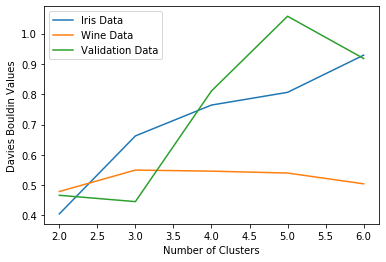

In [5]:
plotting(iris_data, "Iris Data")
plotting(wine_data, "Wine Data")
plotting(validation_data, "Validation Data")
plt.xlabel("Number of Clusters")
plt.ylabel("Davies Bouldin Values")
plt.legend()
plt.show()

### Analysis
The lower the davies bouldin value the better the cluster, and so from our graph we can conclude that for each data set:
Iris data: the best number of partitions of k were 2
Wine data: the best number of partitions of k were 2
Validation data: the best number of partitions of k were 3

for both the iris and wine data sets the number of classes in ground truth is 3. The difference in values between 2 and 3 clusters for the wine data shows that having two clusters is marginally better, in a test run showing values approximately 0.481 vs 0.534. For the iris data set there is a more exaggerated difference that shows 2 partitions are much better than the expected 3 classes, in a test run the davies bouldin values were 0.405 for 2 vs 0.666 for 3. 

This could suggest that of the three classes in the iris data set, two of the three have similar attributes and so get grouped into one cluster when partitioning into 2. 



## WP5

In [6]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def plot_silhouette(X,max_k):
    """
    – Parameters:
    *
    X: data to be plotted
    *
    max_k: the maximum value of k to be plot
    
    – Returns:
    *
    nothing is returned but several graphs are produced from the data
    """
    
    range_n_clusters = range(2,max_k+1)

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.

        ####  Use your kmeans function below, changing the code if necessary
        cluster_labels = kmeans(X,n_clusters)


        ## Use your sihouette score function(s) below.

        sample_silhouette_values = silhouette_scores(X, cluster_labels)

        silhouette_avg = np.mean(sample_silhouette_values)

        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = [[] for i in range(n_clusters)]
            for j in range(len(cluster_labels)):
                ith_cluster_silhouette_values[cluster_labels[j]].append(sample_silhouette_values[j])
                    
            
            ith_cluster_silhouette_values = ith_cluster_silhouette_values[i].copy()
            
            ith_cluster_silhouette_values = sorted(ith_cluster_silhouette_values)
            size_cluster_i = np.asarray(ith_cluster_silhouette_values).shape[0]
            
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral((np.asarray(cluster_labels)).astype(float) / n_clusters)
        ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = np.asarray(workout_centroids(readfile(X), cluster_labels))
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
        


## WP6

For n_clusters = 2 The average silhouette_score is : 0.6439333726529337
For n_clusters = 3 The average silhouette_score is : 0.6737331251885166
For n_clusters = 4 The average silhouette_score is : 0.5479943467447225
For n_clusters = 5 The average silhouette_score is : 0.3978106900977857
For n_clusters = 6 The average silhouette_score is : 0.386331727013556


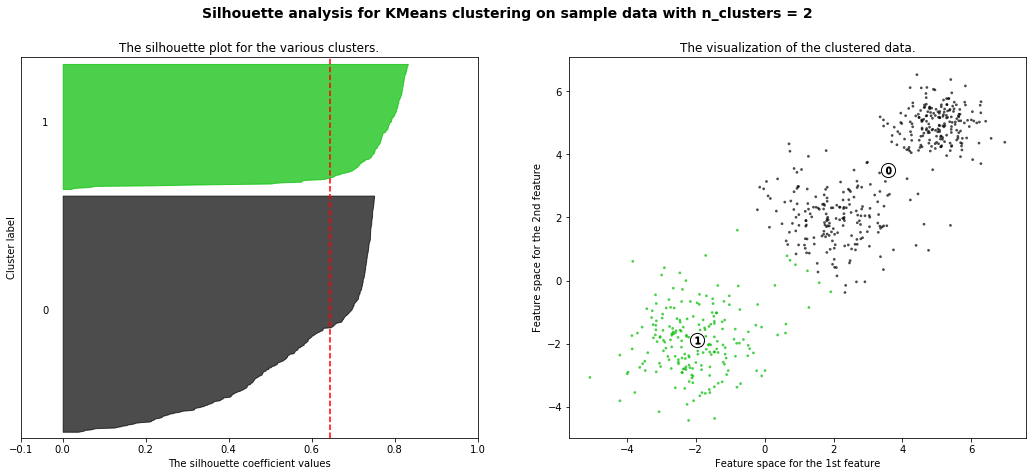

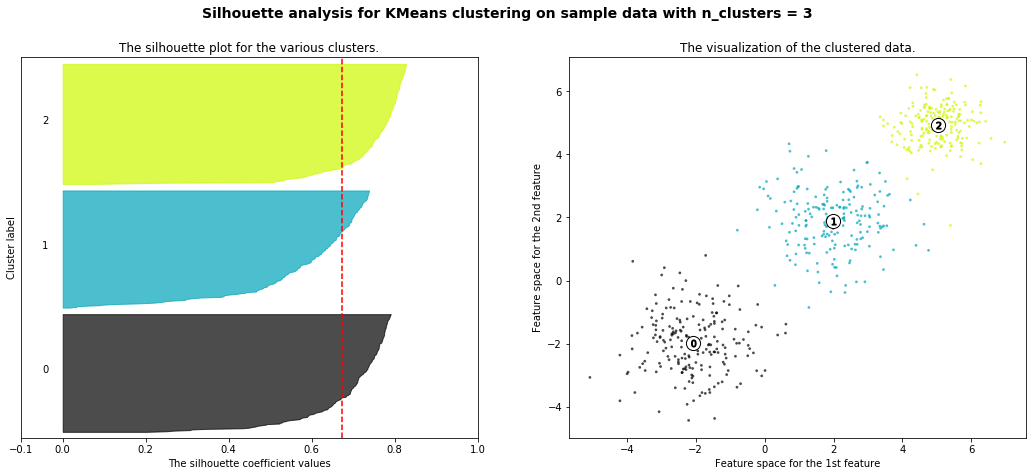

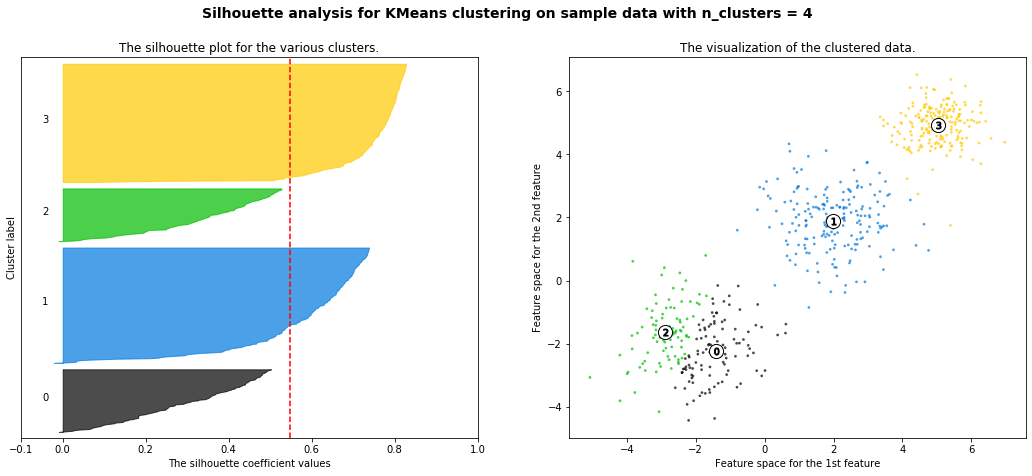

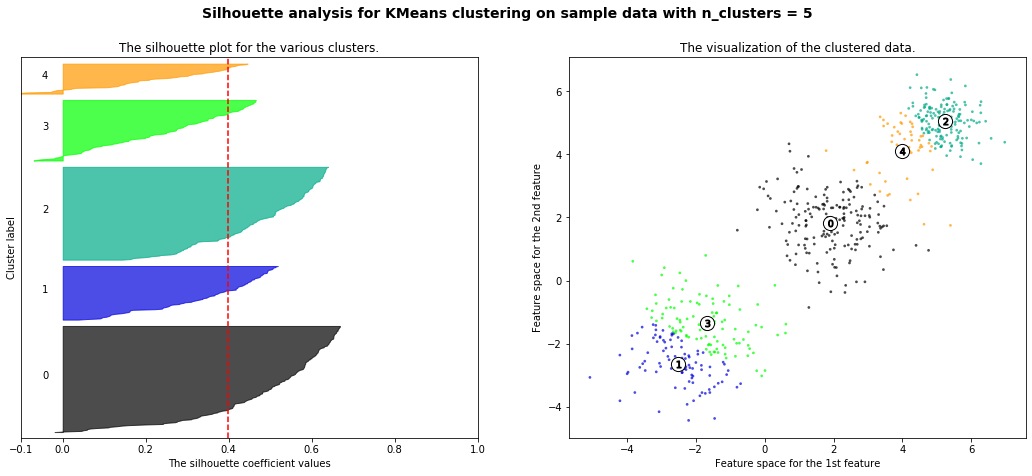

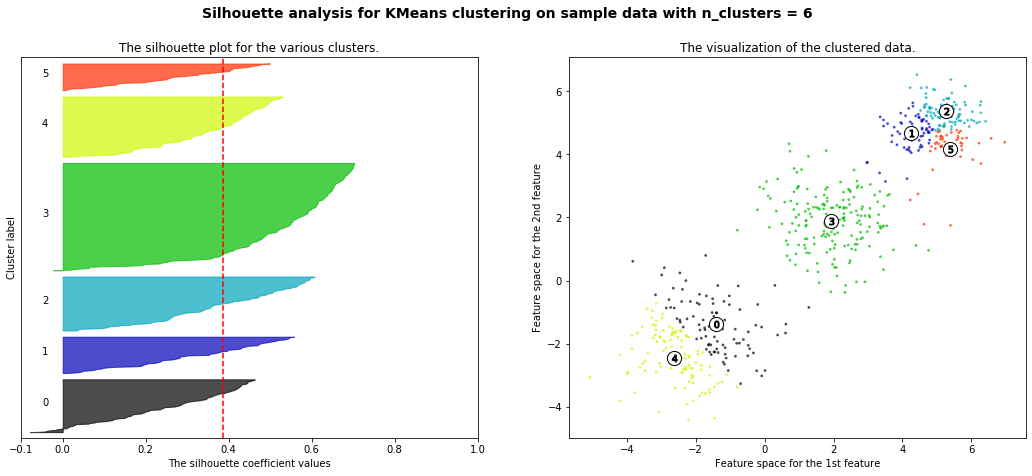

In [7]:
plot_silhouette(validation_data, 6)
plt.show()

For each of the following k partitions of Validation Data 

2: The width of the partitions are very different, this isnt a suitable selection

3: The plot shows similar width for all three, the average is the highest of all other partitions. This is a good selection.

4: two of the clusters are below average and the width of these two are vastly different to the others this isnt a suitable selection

5&6: The width of the partitions are very different, there are clusters with negative values and majority of the clusters are below average so this isnt a suitable selection


Best Selection From my Analysis is: 3 Clusters


For n_clusters = 2 The average silhouette_score is : 0.6808136202936814
For n_clusters = 3 The average silhouette_score is : 0.5167485444533739
For n_clusters = 4 The average silhouette_score is : 0.49699284998335713
For n_clusters = 5 The average silhouette_score is : 0.3674939065482846
For n_clusters = 6 The average silhouette_score is : 0.3296992865402865


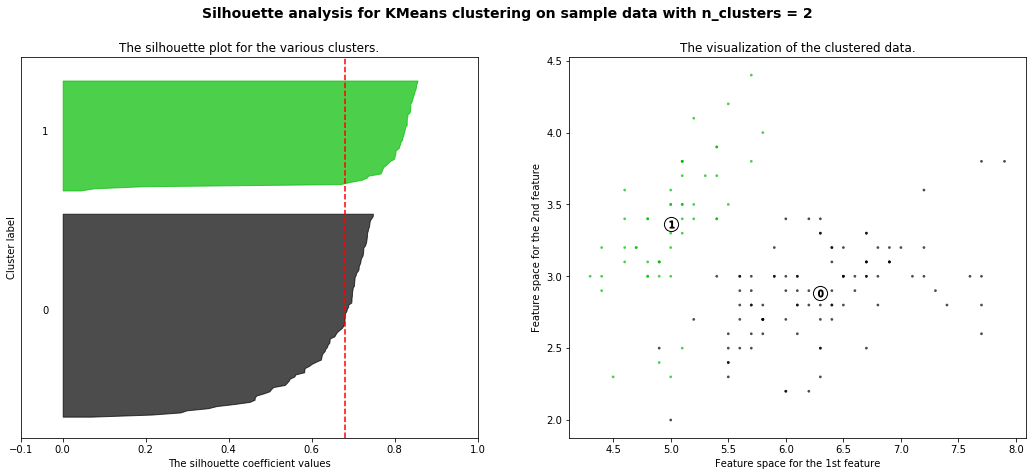

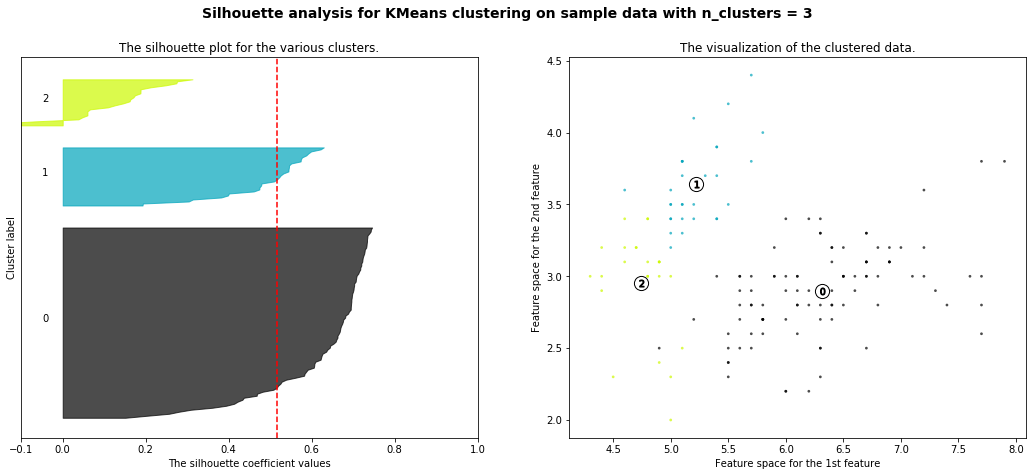

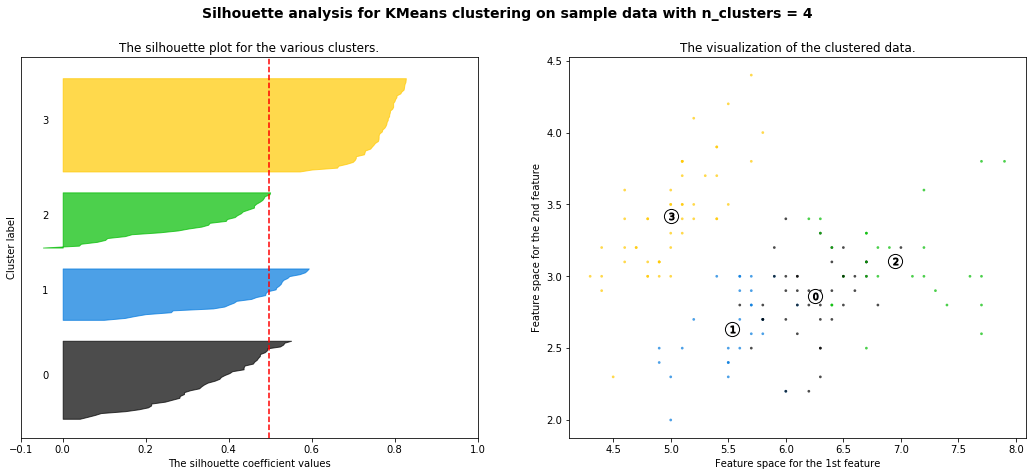

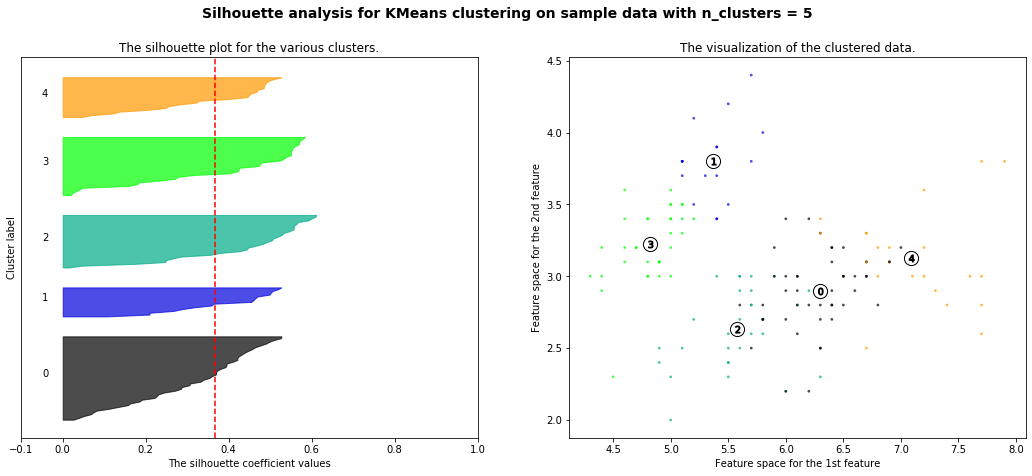

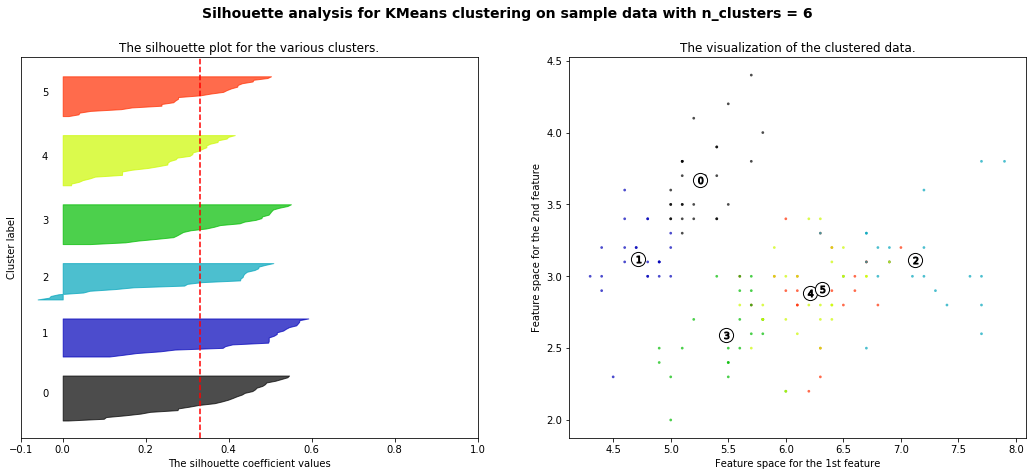

In [8]:
plot_silhouette(iris_data, 6)
plt.show()

For each of the following k partitions of Iris Data

2: This partitioning has the highest average, howvever the width of the partitions are very different, it may be a suitable selection.

3: The plot shows a small difference width for all three, there are no negative values seen and so this is a possible choice

4: Cluster 0 is much bigger than the other three and the other three are mainly below average. There are some negative values in cluster 1, this isnt a suitable selection 

5: The clusters are similar in size and they are all in the average although the average is quite small. This is a possible choice

6: There is a big difference in size especially between clusters 5 and 3, there are also negative numbers, this is not a suitable choice

Between 3 and 2 is close but I think that 3 clusters have a more similar width 

Best Selection From my Analysis is: 3 Clusters

For n_clusters = 2 The average silhouette_score is : 0.655521358978658
For n_clusters = 3 The average silhouette_score is : 0.571138193786884
For n_clusters = 4 The average silhouette_score is : 0.5587089480903829
For n_clusters = 5 The average silhouette_score is : 0.5489993239795681
For n_clusters = 6 The average silhouette_score is : 0.5421550993884968


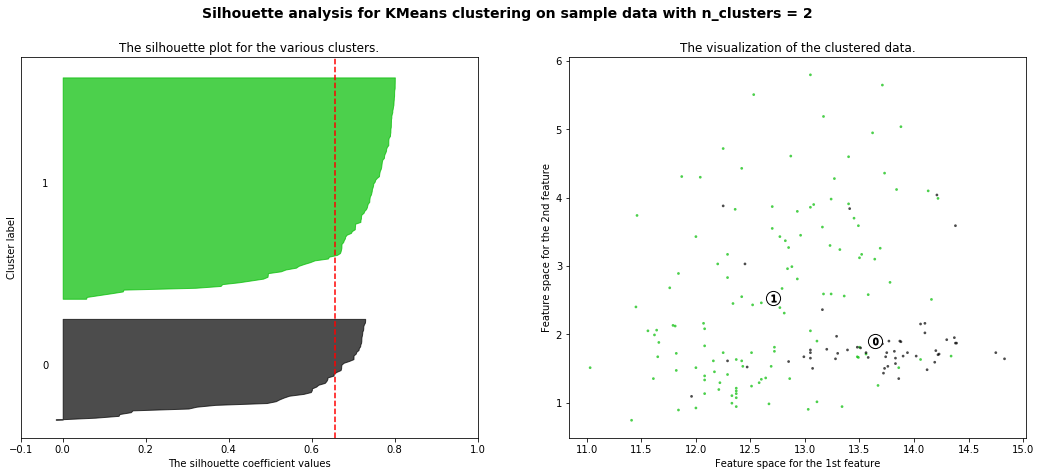

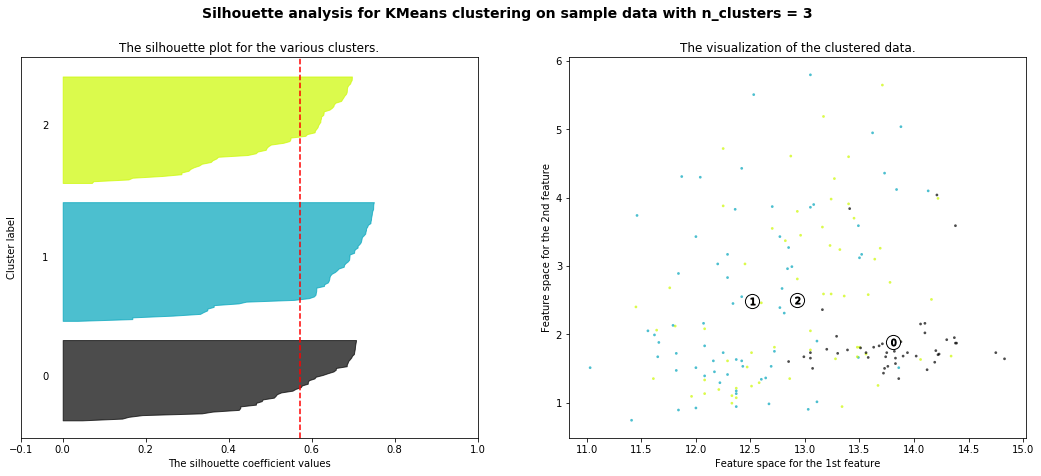

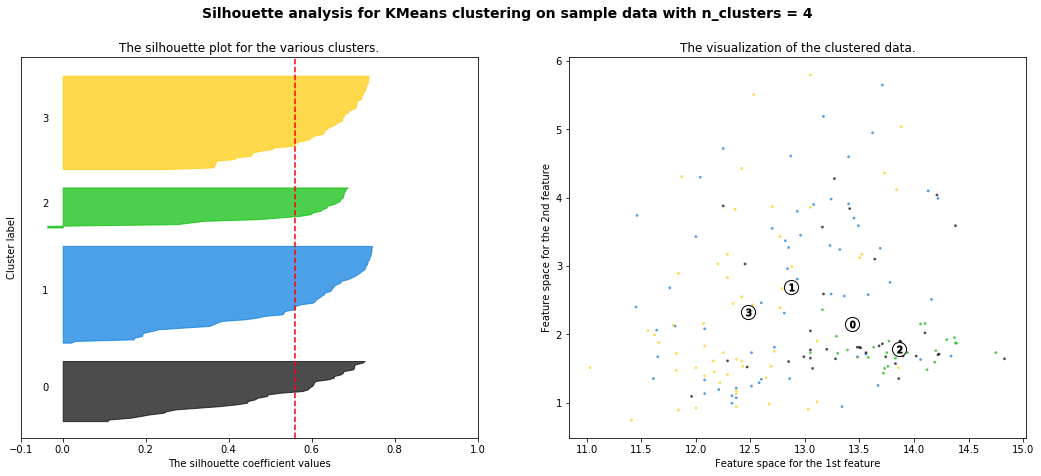

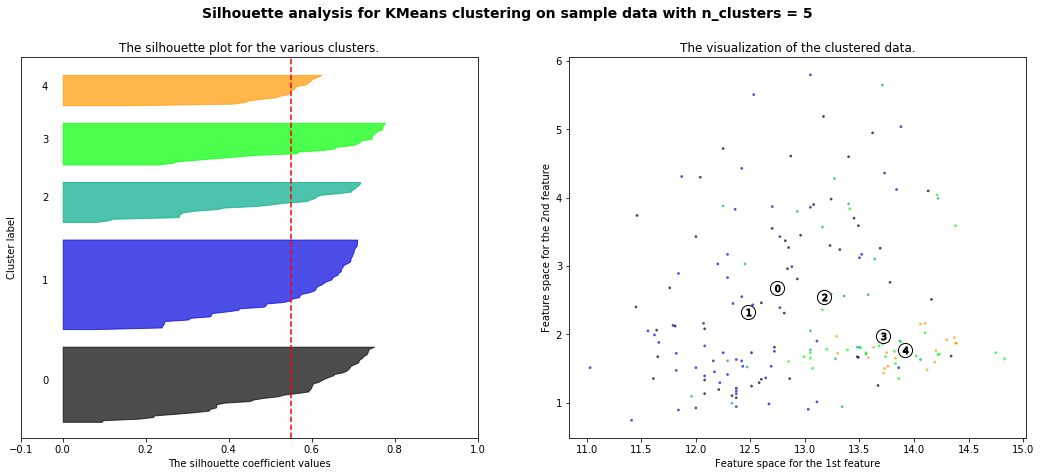

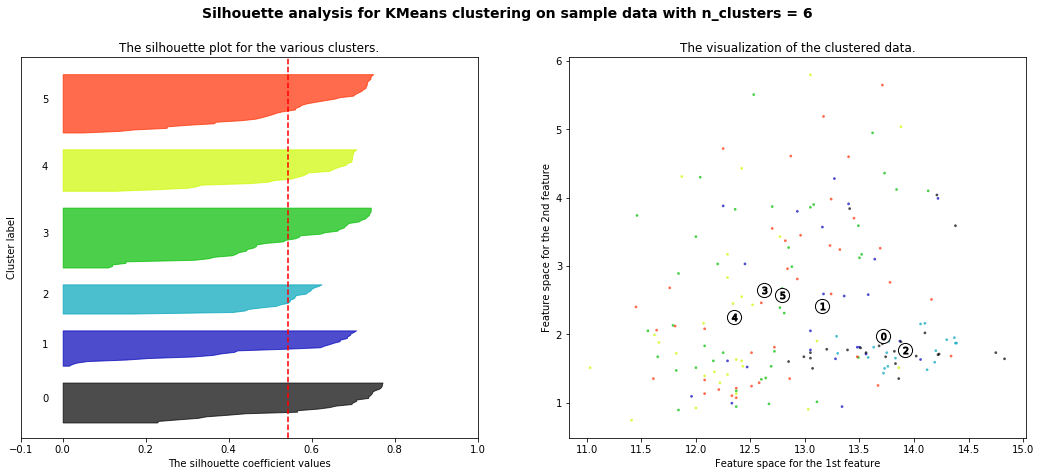

In [9]:
plot_silhouette(wine_data, 6)
plt.show()

For each of the following k partitions of Wine Data

2: The width of the partitions are fairly differentbut it does have the highest average score this may be suitable for selection

3: Cluster 2's width is slightly bigger than cluster 1 and 0 so therefore it may not be a suitable selection. 

4: Cluster 1's width is much too small compared to all others for this to be a suitable selection

5: Cluster 3's width is too small compared to all others for this to be a suitable selction.

6: All clusters are roughly the same width, there is very few negative values in cluster 3 and all clusters have many values over the average.

For the best selection it is a choice between 2, 3 and 6. These all have suitable pros and cons but i think that 2 is the best due to the fact it has the highest average score

Best Selection From my Analysis is: 2 Clusters

For the iris data the best silhouette value matched the 3 classes in reality, and so I would conclude the algorithm performed well for this data set, however 2 classes would have made a good selection, this may be because two of the three iris data sets were similar and one set a lot more different to these two.

For the wine data set the actual known classes is 3 and I found a better match to be the 2 classes (3 was up for debate and was one of the more promising plots). I would suggest the clustering algorithm didnt perform very well, this is because the cluster labeled 2 was much larger than the other clusters in the silhouette plot. I dont think the clustering algorithm worked well on this data set because there are 13 bits of data for each wine and comparing all of them in a ground truth class will have some overlap in this data. The values in the first wine data have values varying from 0.28 to 1065, so the distance of some data points will be negligible.   
